## Assignment 7B

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

FilesFolder= r"C:\Users\Gilberto\Desktop\poli\Energy building systems\python4ScientificComputing_Numpy_Pandas_MATPLotLIB\ExternalFiles"
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

CONSUMPTION:

In [3]:
path_consumptionFile= os.path.join(FilesFolder, ConsumptionFileName)
DF_consumption=pd.read_csv(path_consumptionFile, sep=",", index_col=0)

PreviousIndex= DF_consumption.index
NewIndex=pd.to_datetime(PreviousIndex)
DF_consumption.index=NewIndex

DF_consumption_period=DF_consumption["2014-05-15 00:00:00" : "2014-05-31 00:00:00"]

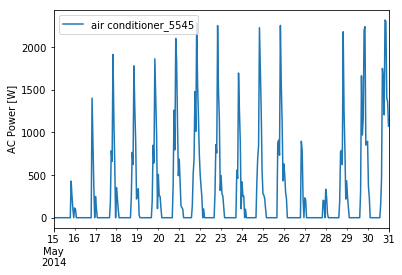

In [22]:
DF_consumption_period.plot()
plt.ylabel("AC Power [W]")
plt.show(1)

TEMPERATURE:

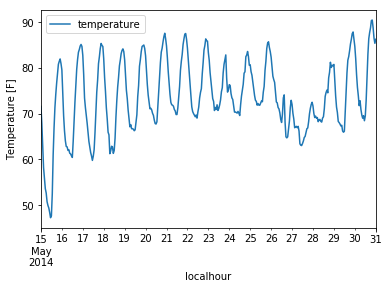

In [21]:
path_TemperatureFile= os.path.join(FilesFolder, TemperatureFileName)
DF_weather=pd.read_csv(path_TemperatureFile, sep=";", index_col=0) #I need to check in the file if separation is with ; or ,

previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index=newIndex_weather

Series_Temperature=DF_weather["temperature"]

DF_temperature=DF_weather[["temperature"]]
DF_temperature_period=DF_temperature["2014-05-15 00:00:00" : "2014-05-31 00:00:00"]

DF_temperature_period.plot()
plt.ylabel("Temperature [F]")
plt.show(1)

IRRADIANCE, correlated to the PV generation:

C:\Users\Gilberto\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


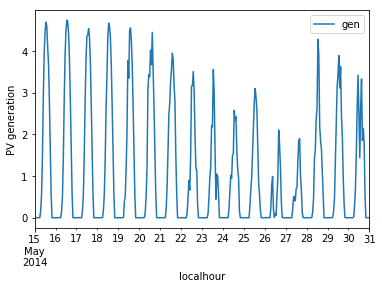

In [23]:
path_IrradianceFile=os.path.join(FilesFolder,IrradianceFileName )
DF_irradianceSource=pd.read_csv(path_IrradianceFile,sep=";", index_col=1 )

DF_irradiance=DF_irradianceSource[["gen"]]

previousIndex_irradiance=DF_irradiance.index
newIndex_irradiance=pd.to_datetime(previousIndex_irradiance)
DF_irradiance.index=newIndex_irradiance

DF_irradiance[DF_irradiance["gen"]<0]=0
DF_irradiance_period=DF_irradiance["2014-05-15 00:00:00" : "2014-05-31 00:00:00"]

DF_irradiance_period.plot()
plt.ylabel("PV generation")
plt.show(1)

Subplot:

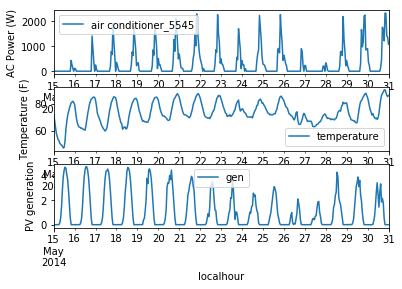

In [15]:
fig,ax=plt.subplots(3)
DF_consumption_period.plot(ax=ax[0])
ax[0].set_ylabel("AC Power (W)")
DF_temperature_period.plot(ax=ax[1])
ax[1].set_ylabel("Temperature (F)")
DF_irradiance_period.plot(ax=ax[2])
ax[2].set_ylabel("PV generation")
plt.show(1)

JOINED DATA FRAME

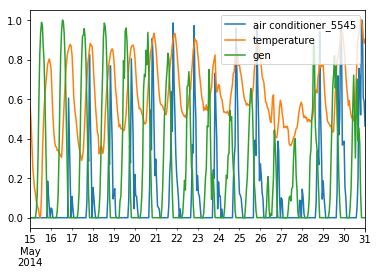

In [16]:
DF_joined = DF_consumption_period.join([DF_temperature_period,DF_irradiance_period])

DF_joined_cleaned= DF_joined.dropna()

DF_joined_cleaned_norm=(DF_joined_cleaned-DF_joined_cleaned.min())/(DF_joined_cleaned.max()-DF_joined_cleaned.min())

DF_joined_cleaned_norm.plot()
plt.show(1)